# **The Graph Isomorphism Problem**

A graph is a mathematical structure that consists of a set of points (vertices) and a set of lines (edges) that connect them. The graph isomorphism problem is a computer science problem that involves checking whether two graphs are isomorphic which means they have the same structure, even if the labels or positions of the vertices are different.

The graph isomorphism problem arises in many fields, including drug discovery, computer science, and social networks. For instance, drug companies use graphs to model drug molecules and apply the graph isomorphism problem to identify new drugs that are similar to existing ones. In computer science, graph isomorphism is used to optimize algorithms, while in social networks, it can help detect similar patterns of connections between users.

By understanding the graph isomorphism problem and developing algorithms to solve it, researchers can better model complex systems and make predictions based on them. However, the problem remains challenging to solve, and even today, there is no efficient algorithm that can solve it for all cases.

# *Simple isomorphic graphs example*

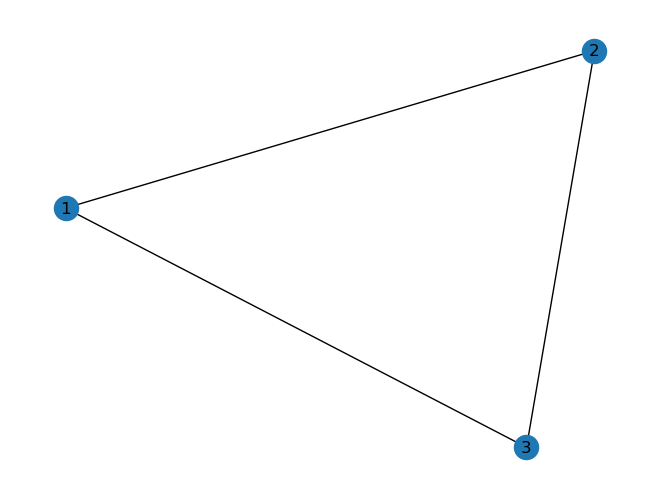

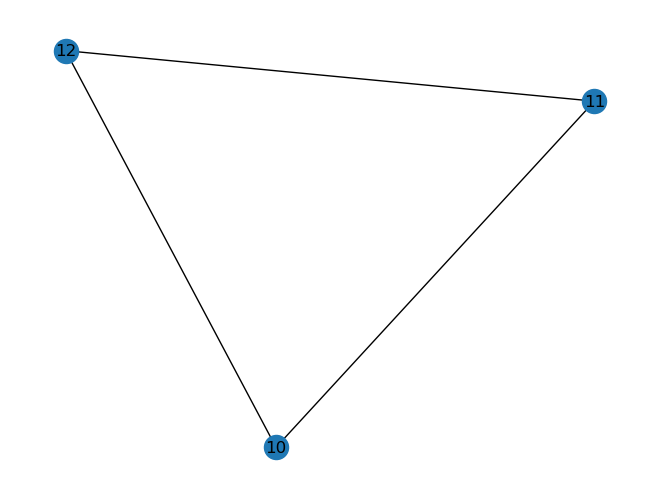

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the first graph
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])
nx.draw(G1, with_labels=True)
plt.show()

# Create the second graph
G2 = nx.Graph()
G2.add_edges_from([(10, 11), (11, 12), (12, 10)])
nx.draw(G2, with_labels=True)
plt.show()

# **Why care about graph isomorphism?**

The example above shows a basic example of an isomorphic graph it is very readable, you can count the number of vertices and edges in each graph and see that both graphs have an identical amount, so why is the graph isomorphism problem so important? The reason the graph isomorphism problem is so important is that in industry the data sets being used are much, much larger. when dealing with n vertices it starts off relatively small and can be understood quite easily like in the above example but the complexity grows very quickly the larger the data sets and you will need to check n! permutations. A simple algorithm would be to check every verice in one grpah corrisponds to every vertice in another graph, however this leads to exponential time complexity O(2^n)

In [65]:
import itertools

def isomorphic(G1, G2):
    #Check if two graphs are isomorphic by checking all permutations of node labels
    n = G1.number_of_nodes()
    for perm in itertools.permutations(range(n)):
        # Create a dictionary mapping nodes in G1 to nodes in G2 using the permutation of node labels
        node_map = {i: perm[i] for i in range(n)}
        # Check if the permutation of node labels makes G1 isomorphic to G2
        if all(G1.has_edge(u, v) == G2.has_edge(node_map[u], node_map[v]) for u in range(n) for v in range(n)):
            return True
    return False


import networkx as nx

# Create graphs
G1 = nx.Graph()
G2 = nx.Graph()
G3 = nx.Graph()
G4 = nx.Graph()

# Add edges to Graphs
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])
G2.add_edges_from([(4, 5), (5, 6), (6, 4)])

G3.add_edges_from([(1, 2), (2, 3), (3, 1)])
G4.add_edges_from([(2, 3), (1, 2), (3, 1)])

# check if g1 and g2 are isomporphic
if isomorphic(G1, G2):
    print("The graphs g1 and g2 are isomorphic.")
else:
    print("The graphs g1 and g2 are not isomorphic.")

#check if g3 and g4 are isomorphic
if isomorphic(G3, G4):
    print("The graphs g3 and g4 are isomorphic.")
else:
    print("The graphs g3 and g4 are not isomorphic.")


The graphs g1 and g2 are not isomorphic.
The graphs g3 and g4 are not isomorphic.


The Above code is an example of a simple brute force algoritm that that checks to see if the graphs g1 and g2 are isomorphic as well as checking to see if g3 and g4 are isomorphic. it does this by first checking to see if the number of nodes in each graphs are equal if not it retiurns false, if they are equal then it iterates over all permutations of the nodes labels of the first graph, and for each permutation, it creates a dictionary that maps the nodes of the first graph to the nodes of the second graph using the permutation of node labels

Then the algorithm compares the edges of all node pairs between the two graphs and then checks to see if the permutations of node labels makes the two graphs isomorphic. the algorithm needs to iterate over every possibility until it finds a permutation that is isomorphic and returns a value of true or until it has fully exhausted all permutations in which case it would return false 